# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv'

data = pd.read_csv(url)

data.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


Questions

1. Delete unnamed columns

In [3]:
data.columns
# No unnamed columns

Index(['year', 'name', 'percent', 'sex'], dtype='object')

2. Show the distribution of male and female

In [59]:
#The question is not clear. Based on simple count
print('Count distribution over all dataset')
print(data.sex.value_counts()/len(data))

print('-------\nPercent distribution over all dataset')
print(data.groupby('sex').percent.sum()/data.percent.sum())

Count distribution over all dataset
boy     0.5
girl    0.5
Name: sex, dtype: float64
-------
Percent distribution over all dataset
sex
boy     0.511935
girl    0.488065
Name: percent, dtype: float64


3. Show the top 5 most preferred names

In [20]:
pname = data.groupby('name').percent.sum().reset_index().sort_values(by=['percent'],ascending=[False]).head()
print(pname)


         name   percent
3379     John  5.320360
3124    James  4.593850
4594     Mary  4.534115
6631  William  4.424557
5516   Robert  3.836721


4. What is the median name occurence in the dataset

In [32]:
import numpy as np
#Create Cumulative distribution frequency table. Find total count and divide by 2 which is median. Then use npsorted to find right 
#index to get median name.

df_name = data.name.value_counts()[-1::-1].cumsum()
med = df_name[-1]/2
ind = np.searchsorted(df_name,med, side='right')
print("Median name based on Cumulative Frequency distribution : ",df_name.index[ind])


Median name based on Cumulative Frequency distribution :  Serena


5. Distribution of male and female born count by states

In [90]:
#There is no states column. I assume you mean year
#Normalised distribution based on percent
    
pd.crosstab(columns=data.sex,index=data.year,values=data.percent
            ,aggfunc=np.sum,normalize='index').head()

sex,boy,girl
year,,
1880,0.498981,0.501019
1881,0.499396,0.500604
1882,0.499071,0.500929
1883,0.498782,0.501218
1884,0.498907,0.501093


#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


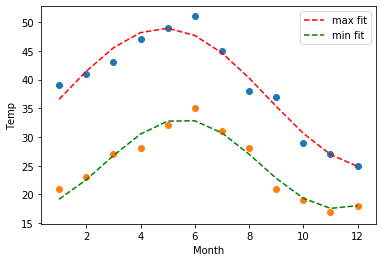

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

ymax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
ymin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
x = list(range(1,13))

plt.scatter(x,ymax)
plt.scatter(x,ymin)
plt.xlabel('Month')
plt.ylabel('Temp')

def temperature_fit(x, mid, amplitude, phase, freq):
    val = mid + amplitude * np.cos((x + phase) * np.pi * freq)
    return val

y = ymax
max_param, _ = optimize.curve_fit(temperature_fit, x, y,
                [y.max()+y.min()/2, (y.max()-y.min())/2, -y.argmax(),1/12] )

y = ymin
min_param, _ = optimize.curve_fit(temperature_fit, x, y,
                [y.max()+y.min()/2, (y.max()-y.min())/2, -y.argmax(), 1/12] )



plt.plot(x, temperature_fit(x,*max_param), 'r--', label='max fit')
plt.plot(x, temperature_fit(x,*min_param), 'g--', label='min fit')
plt.legend()
plt.show()